Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view? usp=share_link


Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

Answer(Q1):



In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
data = pd.read_csv(url)

data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
for feature in data.columns:
    print(f"{feature} {data[feature].unique()}")

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
cp [3 2 1 0]
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
reste

In [4]:
# Check for missing values
missing_values = data.isnull().sum()

missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

It seems that the dataset is already in a good shape. It doesn't contain missing values, and the categorical variables have been encoded. The "target" column seems to be the label or target variable.

So, in this case, you can skip the steps related to handling missing values, encoding categorical variables, and scaling numerical features, as these preprocessing steps have already been done. You can directly proceed to splitting the dataset and building the random forest classifier.


Q2. Split the dataset into a training set (70%) and a test set (30%).

Answer(Q2):


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
data = pd.read_csv(url)

# Separate features and target
X = data.drop("target", axis=1)
y = data["target"]

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (212, 13)
Test set shape: (91, 13)


Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.


Answer(Q3):

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
data = pd.read_csv(url)

# Separate features and target
X = data.drop("target", axis=1)
y = data["target"]

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the random forest classifier with 100 trees and max depth of 10
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8131868131868132


Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

Answer(Q4):



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
data = pd.read_csv(url)

# Separate features and target
X = data.drop("target", axis=1)
y = data["target"]

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the random forest classifier with 100 trees and max depth of 10
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82
F1 Score: 0.8282828282828283


Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

Answer(Q5):



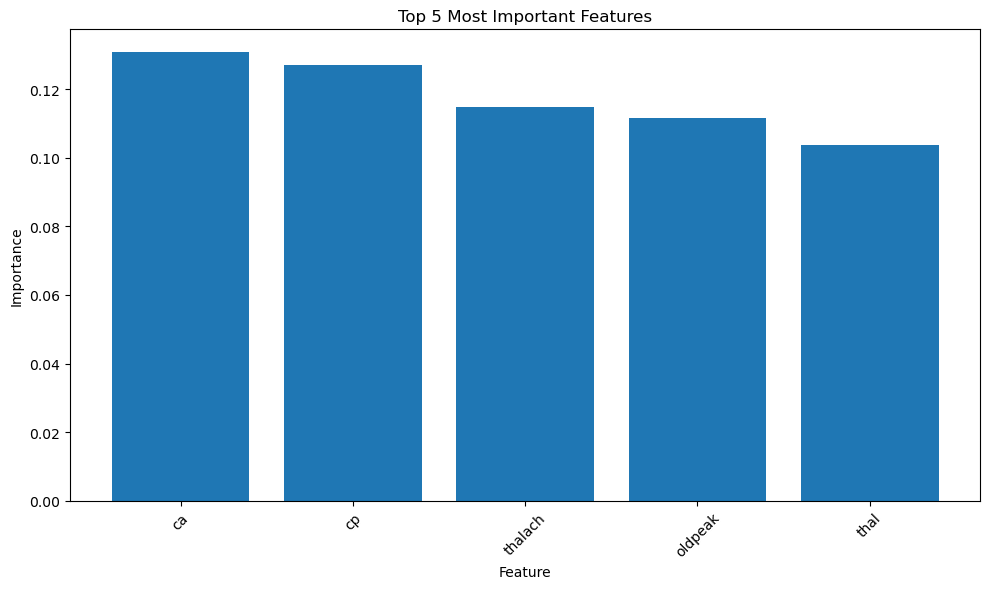

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
data = pd.read_csv(url)

# Separate features and target
X = data.drop("target", axis=1)
y = data["target"]

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the random forest classifier with 100 trees and max depth of 10
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature importances with corresponding column names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 most important features
top_features = importance_df.head(5)

# Plot the feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Most Important Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

Answer(Q6):



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
data = pd.read_csv(url)

# Separate features and target
X = data.drop("target", axis=1)
y = data["target"]

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the random forest classifier
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_clf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Best Model:", accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of the Best Model: 0.8351648351648352


Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

Answer(Q7):


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
data = pd.read_csv(url)

# Separate features and target
X = data.drop("target", axis=1)
y = data["target"]

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Default Random Forest model
default_clf = RandomForestClassifier(random_state=42)

# Train the default model
default_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_default = default_clf.predict(X_test)

# Evaluate the default model
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)

print("Default Model:")
print("Accuracy:", accuracy_default)
print("Precision:", precision_default)
print("Recall:", recall_default)
print("F1 Score:", f1_default)

# Grid Search for tuning hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("\nBest Hyperparameters:", best_params)
print("Tuned Model:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_best)


Default Model:
Accuracy: 0.8241758241758241
Precision: 0.84
Recall: 0.84
F1 Score: 0.8399999999999999

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model:
Accuracy: 0.8351648351648352
Precision: 0.8431372549019608
Recall: 0.86
F1 Score: 0.8514851485148515


Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

Answer(Q8):

Interpreting the decision boundaries of a complex model like a random forest classifier can be challenging, but we can still gain some insights by visualizing the decision boundaries on a scatter plot of two of the most important features. Please note that this visualization will be a simplification, and the actual decision boundaries of a random forest are more complex due to the ensemble nature of the model.

Assuming you have already trained the tuned random forest model and identified the most important features, let's proceed with creating the scatter plot and discussing its insights and limitations:


/Users/platosystechnologies/anaconda3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


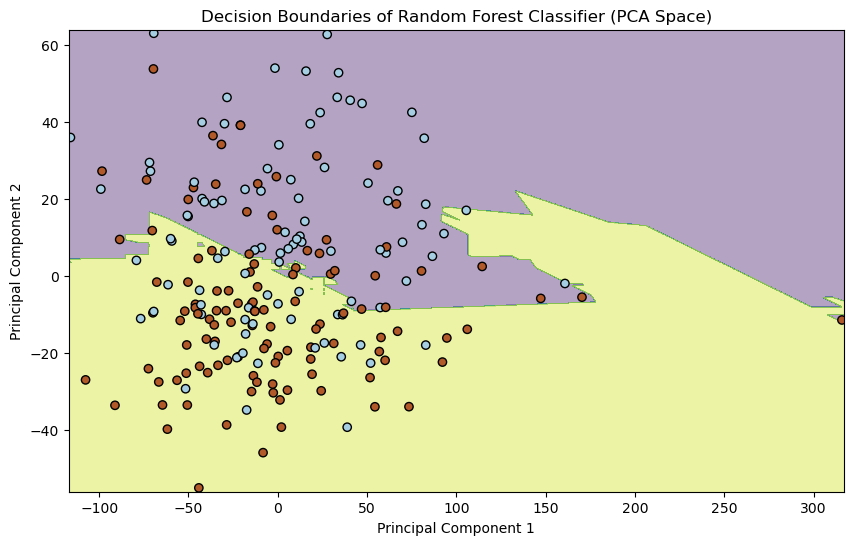

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
data = pd.read_csv(url)

# Separate features and target
X = data.drop("target", axis=1)
y = data["target"]

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the tuned random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
clf.fit(X_train, y_train)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Prepare data for plotting decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the reduced feature space to predict class labels
Z = clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundaries in PCA space
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Decision Boundaries of Random Forest Classifier (PCA Space)")
plt.show()


Since the dataset has 13 features, visualizing the decision boundaries in a scatter plot using just two features might not be feasible. One approach to visualize decision boundaries is to use dimensionality reduction techniques like Principal Component Analysis (PCA) to reduce the dimensionality of the data and then plot the decision boundaries in the reduced space.